In [0]:
class Activation(object):

      
    def __relu(self,x):
        
        return np.maximum(0,x)
      
    def __relu_deriv(self,a):
        
        return np.maximum(0,np.abs(a)/a)
      
    def __softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x),axis=0)
      
    def __softmax_deriv(self, a):
        
        return a*(1-a)

    def __init__(self,activation='relu'):
        if activation == 'softmax':
            self.f = self.__softmax
            self.f_deriv = self.__softmax_deriv
        elif activation == 'relu':
            self.f = self.__relu
            self.f_deriv = self.__relu_deriv

In [33]:
import numpy as np 

test1= Activation("softmax")
test1._Activation__relu_deriv(8)
test1.f(np.array([[7,4,2]]))
test1._Activation__softmax_deriv(np.array([.5,.3,.2]).T)

array([0.25, 0.21, 0.16])

In [27]:
q= np.array([1,2,3])
W= np.array([[1,2],[2,3],[2,1]])
W.shape

(3, 2)

In [28]:
q.shape

(3,)

In [0]:
class HiddenLayer(object):    
    def __init__(self,n_in, n_out, W=None, b=None, activation = "relu"):
        """
        Typical hidden layer of a MLP: units are fully-connected and have
        sigmoidal activation function. Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        Hidden unit activation is given by: tanh(dot(input,W) + b)

        :type n_in: int
        :param n_in: dimensionality of input

        :type n_out: int
        :param n_out: number of hidden units

        :type activation: string
        :param activation: Non linearity to be applied in the hidden
                           layer
        """
        self.input=None
        self.activation=Activation(activation).f
        self.activation_deriv=Activation(activation).f_deriv
        # end-snippet-1

        # `W` is initialized with `W_values` which is uniformely sampled
        # from sqrt(-6./(n_in+n_hidden)) and sqrt(6./(n_in+n_hidden))
        # Note : optimal initialization of weights is dependent on the
        #        activation function used (among other things).
        #        For example, results presented in [Xavier10] suggest that you
        #        should use 4 times larger initial weights for sigmoid
        #        compared to tanh
        #        We have no info for other function, so we use the same as
        #        tanh.
        self.W = np.random.uniform(
                low=-np.sqrt(6. / (n_in + n_out)),
                high=np.sqrt(6. / (n_in + n_out)),
                size=(n_in, n_out)
        )
        # if activation == 'softmax':
          #  W_values *= 4

        self.b = np.zeros(n_out,)
        
        self.grad_W = np.zeros(self.W.shape)
        self.grad_b = np.zeros(self.b.shape)
        
    def forward(self, input):
        '''
        :type input: numpy.array
        :param input: a symbolic tensor of shape (n_in,)
        '''
        lin_output = np.dot(input, self.W) + self.b
        self.output = (
            lin_output if self.activation is None
            else self.activation(lin_output)
        )
        self.input=input
        return self.output
    
    def backward(self, delta):       
        self.grad_W = np.atleast_2d(self.input).T.dot(np.atleast_2d(delta))
        self.grad_b = delta
        # return delta_ for next layer
        delta_ = delta.dot(self.W.T) * self.activation_deriv(self.input)
        return delta_

In [12]:
np.atleast_2d(np.array([2,3,2])).T.shape

(3, 1)

In [11]:
np.array([2,3,3]).shape

(3,)

In [7]:
qqq=[2,3,4]
qqq[:-1]

[2, 3]

In [20]:
q=[]
import numpy as np
q.append( HiddenLayer(2,5) )
q

In [1]:
QQ=[2,2,2,2,1]
QQ[:-1]

[2, 2, 2, 2]

In [0]:
class MLP:
    """
    """      
    def __init__(self, layers):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        """        
        ### initialize layers
        self.layers=[]
        self.params=[]
        
        self.activation= None 
        for i in range(len(layers)-2):
            self.layers.append(HiddenLayer(layers[i],layers[i+1], activation="relu"))
        L = len(layers)
        self.layers.append(HiddenLayer(layers[L-2],layers[L-1], activation="softmax")) 
            
    def forward(self,input):
        for layer in self.layers:
            output=layer.forward(input)
            input=output
        
        return output
    
    def criterion_cross_entropy(self, y, y_hat):
        activation_deriv=Activation("softmax").f_deriv
        
        loss = -np.sum(np.log(y_hat) * y) 
        
        error = y-y_hat
        
        delta = error*activation_deriv(y_hat)  
        
        return loss, delta
      
      
    """
    
    
    
    def criterion_MSE(self,y,y_hat):
        activation_deriv=Activation(self.activation).f_deriv
        # MSE
        error = y-y_hat
        loss=error**2
        # write down the delta in the last layer
        delta=error*activation_deriv(y_hat)    
        # return loss and delta
        return loss,delta
    """
    
    def backward(self,delta):        
        for layer in reversed(self.layers):
            delta=layer.backward(delta)
            
    def update(self,lr):
        for layer in self.layers:
            layer.W += lr * layer.grad_W
            layer.b += lr * layer.grad_b

    def fit(self,X,y, learning_rate=0.1, epochs=100):
        """
        Online learning.
        :param X: Input data or features
        :param y: Input targets
        :param learning_rate: parameters defining the speed of learning
        :param epochs: number of times the dataset is presented to the network for learning
        """ 
        X=np.array(X)
        y=np.array(y)
        yn = y.shape[1]
        to_return = np.zeros(epochs)
        
        
        
        for k in range(epochs):
            loss=np.zeros([X.shape[0], yn])
            for i in range(X.shape[0]):
                #i=np.random.randint(X.shape[0])
                
                # forward pass
                y_hat = self.forward(X[i])
                
                # backward pass
                loss[i, :],delta=self.criterion_cross_entropy(y[i],y_hat)
                self.backward(delta)
                
                #print(k, i, delta)
                
                # update
                self.update(learning_rate)
            to_return[k] = np.mean(loss)
        return to_return

    def predict(self, x):
        x = np.array(x)
        output = np.zeros(x.shape[0])
        for i in np.arange(x.shape[0]):
            output[i] = nn.forward(x[i,:])
        return output

In [0]:
case1 = MLP([5,10], '')

In [47]:
input_data

array([[0.53111989, 0.28873701]])

In [92]:
labels = np.array([2,3,1,3,2,3,7,5,7,9])
y_enc = (np.arange(np.max(labels) + 1) == labels[:, None]).astype(float)

y_enc

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [48]:
output_data

array([[0.43421551]])

In [97]:
nn.predict(input_data)

ValueError: ignored

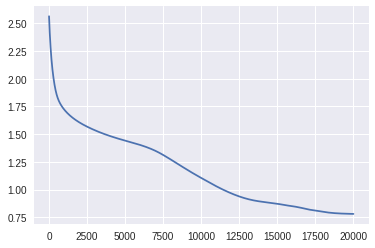

In [95]:
np.random.seed(1)
import numpy as np
dataset = np.random.rand(10,10)
nn = MLP([2,5,10])
input_data = dataset[:,0:2]
#output_data = dataset[:,2:5]
output_data = y_enc
#print(len(nn.layers))
MSE = nn.fit(input_data, output_data, learning_rate=0.01, epochs=20000)
#print(MSE)
import matplotlib.pyplot as pl
#from ipywidgets import interact, widgets
from matplotlib import animation
%matplotlib inline
pl.plot(MSE)

In [28]:
input_data

array([[0.72276694, 0.78163658],
       [0.14550554, 0.49773078],
       [0.59231439, 0.89863318],
       [0.22961736, 0.5611184 ],
       [0.52038709, 0.60443923]])

In [29]:
output_data

array([[0.02207495],
       [0.49880742],
       [0.90943017],
       [0.81129693],
       [0.59904009]])

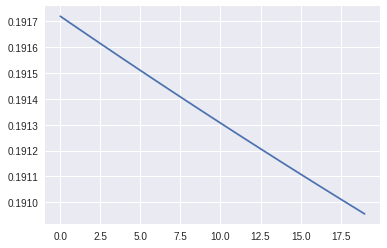

In [55]:
import matplotlib.pyplot as pl
#from ipywidgets import interact, widgets
from matplotlib import animation
%matplotlib inline
pl.plot(MSE)